# Load the data:

In [3]:
import pandas as pd
df = pd.read_csv("data/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Normalize features (e.g. Annual Income and Spending Score):

In [4]:
from sklearn.preprocessing import StandardScaler
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Run the Elbow Method to determine optimal k:

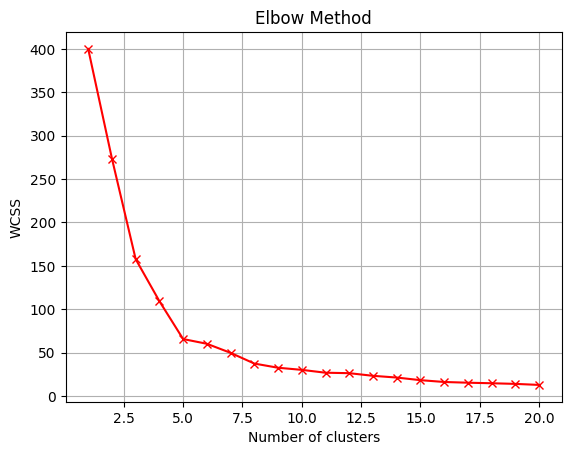

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 21), wcss, marker='x' , c ='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


# Train K-Means

In [27]:
from sklearn.cluster import KMeans

# Use the scaled features (X_scaled)
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


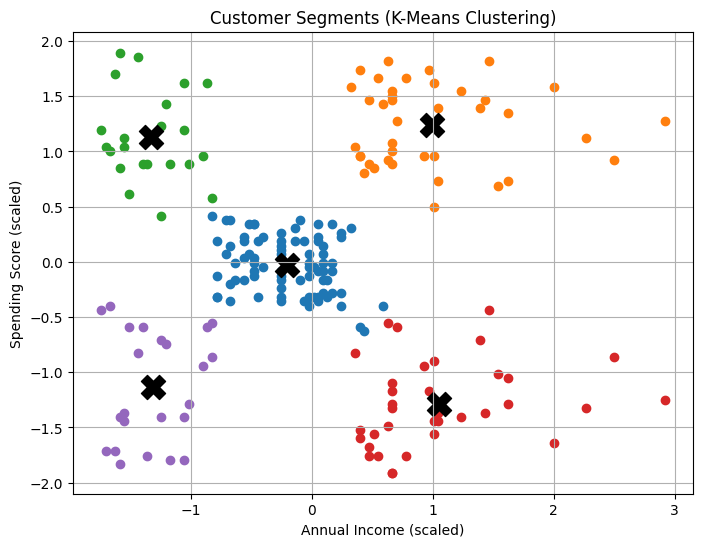

In [28]:
import matplotlib.pyplot as plt
# Mapping descriptive labels to each cluster (based on visual interpretation)
cluster_labels = {
    0: 'Average Income & Spending',  # Blue cluster (center)
    1: 'High Income, High Spending', # Orange cluster (top-right)
    2: 'Low Income, High Spending',  # Green cluster (top-left)
    3: 'High Income, Low Spending',  # Red cluster (bottom-right)
    4: 'Low Income, Low Spending'    # Purple cluster (bottom-left)
}

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster
for i in range(5):
    plt.scatter(
        X_scaled[y_kmeans == i, 0],  # x-axis: Annual Income (scaled)
        X_scaled[y_kmeans == i, 1],  # y-axis: Spending Score (scaled)
        label= cluster_labels[i]
    )

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300, c='black', label='Centroids', marker='X'
)

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
# plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Step 1: Simulate daily sales data for 18 months

import pandas as pd
import numpy as np

# Simulate from Jan 2024 to June 2025
date_range = pd.date_range(start='2024-01-01', end='2025-06-30', freq='D')
np.random.seed(42)

# Simulate number of sales per day (higher on weekends)
daily_sales = []
daily_revenue = []
for date in date_range:
    # Weekday vs weekend logic
    base_customers = 40 if date.weekday() < 5 else 60  # weekdays vs weekends
    fluctuation = np.random.normal(0, 10)
    customers = max(5, int(base_customers + fluctuation))  # no less than 5
    daily_sales.append(customers)
    
    # Revenue per customer varies
    revenue = np.sum(np.random.exponential(scale=20 if customers > 50 else 40, size=customers))
    daily_revenue.append(round(revenue, 2))

# Create DataFrame
df = pd.DataFrame({
    'Date': date_range,
    'NumberOfSales': daily_sales,
    'TotalRevenue': daily_revenue
})

df.head()
df.to_csv("sales.csv")